In [2]:
# PACKAGES TO IMPORT
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.stats import sigma_clipped_stats
%matplotlib inline

In [3]:
data = fits.open('data/M33_VLASS1.2.fits')
data

In [4]:
# Functions to plot RADIO AND OPTICAL IMAGES

# Optical Graphs
def Optical(file,a):
    Galx_Img = fits.open(file)
    mean, median, std = sigma_clipped_stats(Galx_Img[0].data)
    plt.imshow(Galx_Img[0].data, vmin = median - a*std, vmax = median + a*std, cmap='plasma')
    plt.colorbar()

# Radio Graphs
def Radio(file,a):
    Galx_Radio = fits.open(file)
    RadioData = []
    for i in range(len(Galx_Radio[0].data[0][0])):
        RadioData.append(Galx_Radio[0].data[0][0][i])
    mean, median, std = sigma_clipped_stats(RadioData)
    plt.imshow(RadioData, vmin = median - a*std, vmax = median + a*std, cmap='viridis')

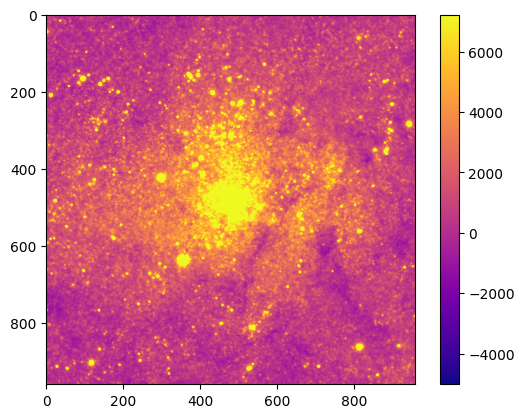

In [5]:
Optical('data/M33_panSTARRS.fits',5)
#Optical('data/M33_panSTARRS.fits',15)

In [6]:
# Importing data from the GW170817 Afterglow paper
gw170817 = ascii.read('data/gw170817_afterglow_data_full.txt')
VLA_gw170817 = gw170817[(gw170817['Telescope'] == 'VLA') & (gw170817['Freq'] == 3.0e9)]
CH_gw170817 = gw170817[(gw170817['Telescope'] == 'Chandra') & (gw170817['Freq'] == 2.41e17)]

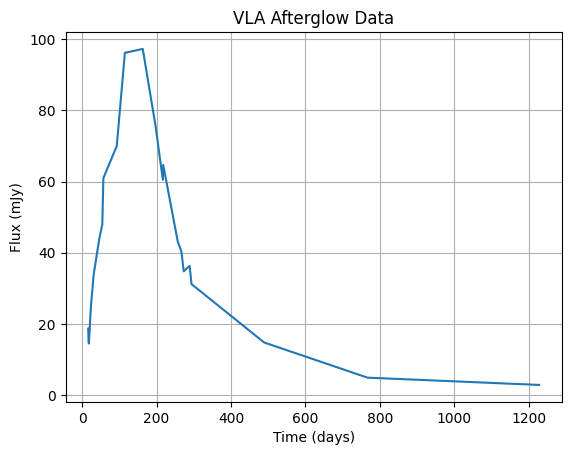

In [7]:
# Ploting After Glow Data from VLA
time = VLA_gw170817['T']
Flux = VLA_gw170817['FluxD']

Flux = Flux[2:]
time = time[2:]
Flux = Flux.astype(float)

plt.clf()
plt.plot(time, Flux)
plt.xlabel('Time (days)')
plt.ylabel('Flux (mJy)')
plt.title('VLA Afterglow Data')
plt.grid()
plt.minorticks_on
plt.show()

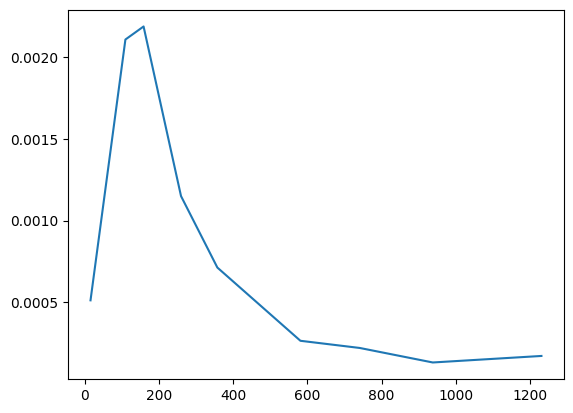

In [8]:
# Ploting After Glow Data from Chandra

time2 = CH_gw170817['T']
Flux2 = CH_gw170817['FluxD']
Flux2 = Flux2[2:]
time2 = time2[2:]
Flux2 = Flux2.astype(float)
plt.clf()
plt.plot(time2, Flux2)
plt.show()

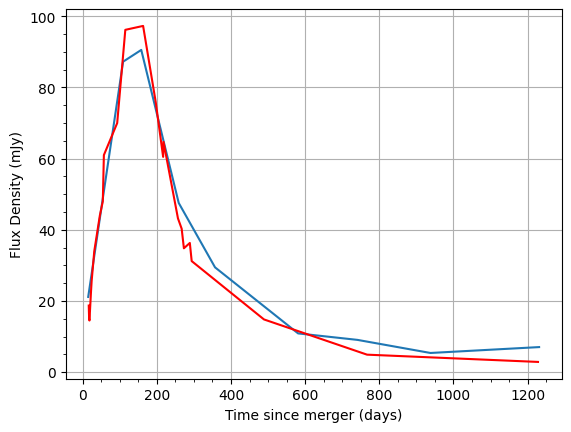

In [9]:
# Scaling the data from Chandra to VLA
def scale(Freq1,FluxD1,Freq2):
    return FluxD1*(Freq2/Freq1)**(-0.584)

Scaled_FLux = scale(2.41e17,Flux2,3.0e9)
plt.clf()
plt.plot(time2, Scaled_FLux)
plt.plot(time, Flux, 'r')
plt.xlabel("Time since merger (days)")
plt.ylabel("Flux Density (mJy)")
plt.grid()
plt.minorticks_on()
plt.show()

### 2.2 Answers
GMRT DEC: 19

1. Lat: 19, A: 0 or N
2. 90-19 = 71
3. 270 or W
4. Cant Observe: M83 ,Omega Centauri, the Large Magellanic Cloud,Centaurus A and the Carina Nebula.
5. Altitute = 90-(19-(−23.381472)) = 90-(19+23.381472) = 90-42.381472 = 47.618528